In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

from sklearn.datasets import load_boston

In [4]:
bos =pd.read_csv('baseball.csv')
bos


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
bos.shape

(30, 17)

In [6]:
bos['ERA']=bos.ERA

In [7]:
bos.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
bos

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [9]:
bos.shape

(30, 17)

In [10]:
bos.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [11]:
bos.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

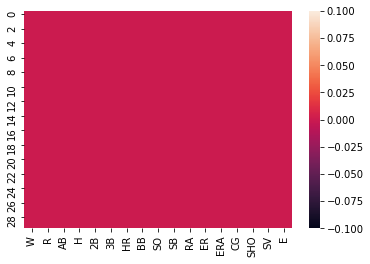

In [12]:
sns.heatmap(bos.isnull())

In [13]:
bos.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [14]:
bos.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<AxesSubplot:>

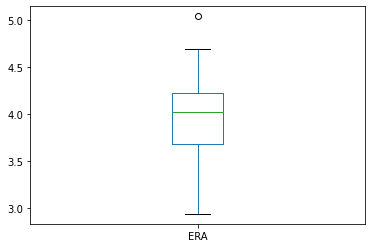

In [15]:
bos['ERA'].plot.box()

<AxesSubplot:>

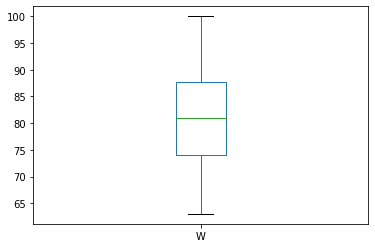

In [16]:
bos['W'].plot.box()

W         AxesSubplot(0.125,0.536818;0.065678x0.343182)
R      AxesSubplot(0.203814,0.536818;0.065678x0.343182)
AB     AxesSubplot(0.282627,0.536818;0.065678x0.343182)
H      AxesSubplot(0.361441,0.536818;0.065678x0.343182)
2B     AxesSubplot(0.440254,0.536818;0.065678x0.343182)
3B     AxesSubplot(0.519068,0.536818;0.065678x0.343182)
HR     AxesSubplot(0.597881,0.536818;0.065678x0.343182)
BB     AxesSubplot(0.676695,0.536818;0.065678x0.343182)
SO     AxesSubplot(0.755508,0.536818;0.065678x0.343182)
SB     AxesSubplot(0.834322,0.536818;0.065678x0.343182)
RA           AxesSubplot(0.125,0.125;0.065678x0.343182)
ER        AxesSubplot(0.203814,0.125;0.065678x0.343182)
ERA       AxesSubplot(0.282627,0.125;0.065678x0.343182)
CG        AxesSubplot(0.361441,0.125;0.065678x0.343182)
SHO       AxesSubplot(0.440254,0.125;0.065678x0.343182)
SV        AxesSubplot(0.519068,0.125;0.065678x0.343182)
E         AxesSubplot(0.597881,0.125;0.065678x0.343182)
dtype: object

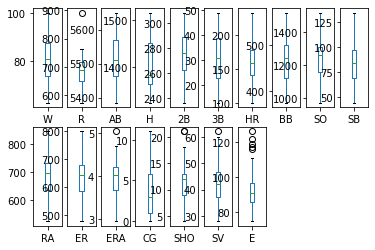

In [17]:
bos.plot(kind='box',subplots=True, layout=(2,10))

<AxesSubplot:ylabel='Frequency'>

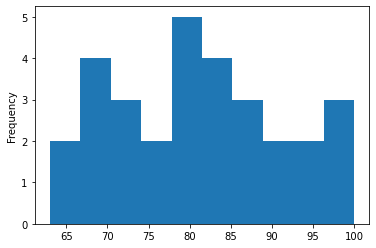

In [18]:
bos['W'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

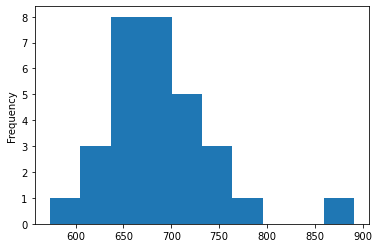

In [19]:
bos['R'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

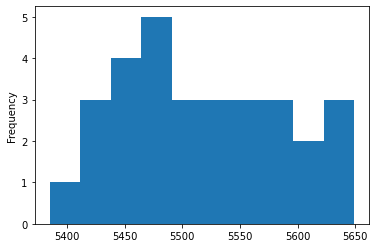

In [20]:
bos['AB'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

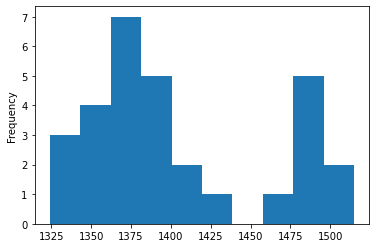

In [21]:
bos['H'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

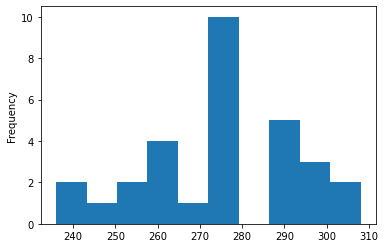

In [22]:
bos['2B'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

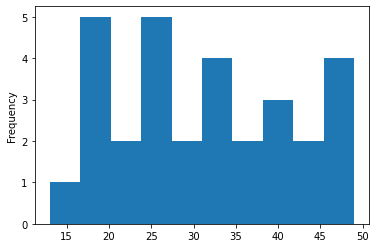

In [23]:
bos['3B'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

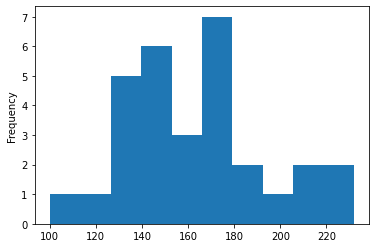

In [24]:
bos['HR'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

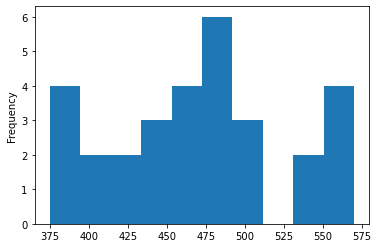

In [25]:
bos['BB'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

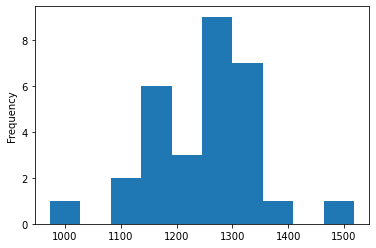

In [26]:
bos['SO'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

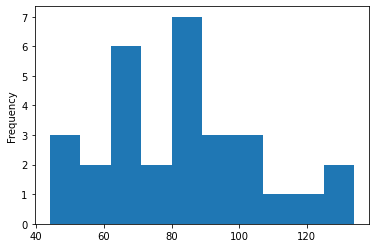

In [27]:
bos['SB'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

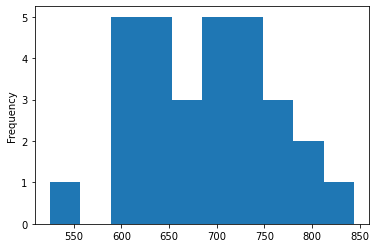

In [28]:
bos['RA'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

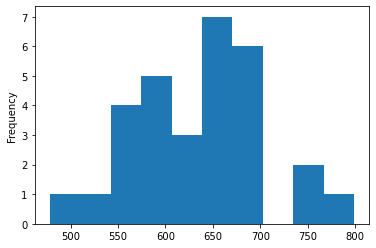

In [29]:
bos['ER'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

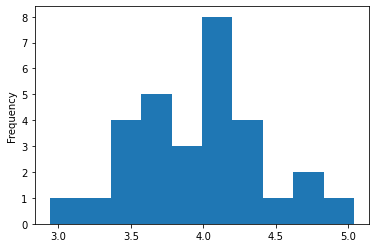

In [30]:
bos['ERA'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

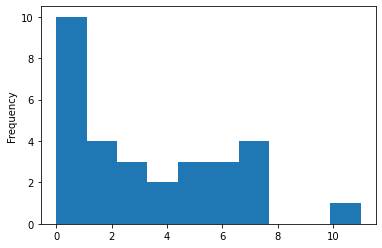

In [31]:
bos['CG'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

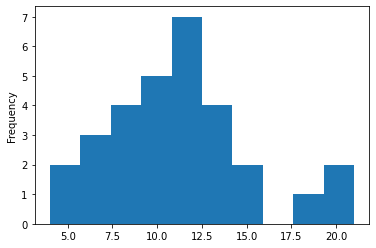

In [32]:
bos['SHO'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

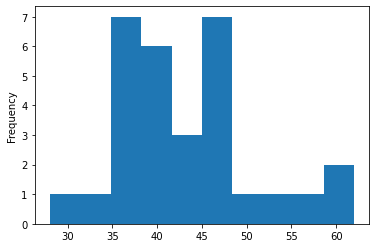

In [33]:
bos['SV'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

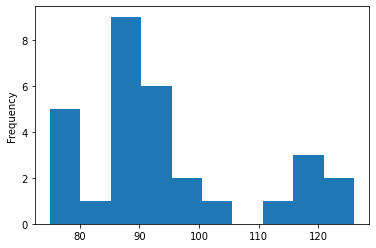

In [34]:
bos['E'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

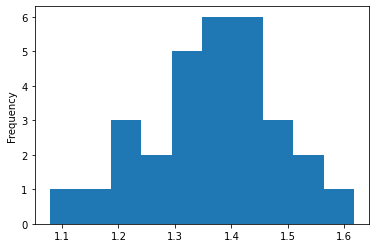

In [35]:
bos['ERA']=np.log(bos['ERA'])
bos['ERA'].plot.hist()

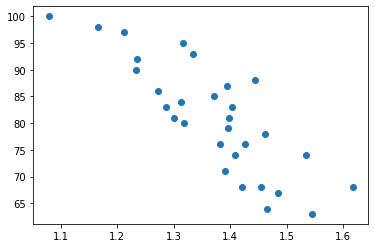

In [36]:
plt.scatter(bos['ERA'],bos['W'])

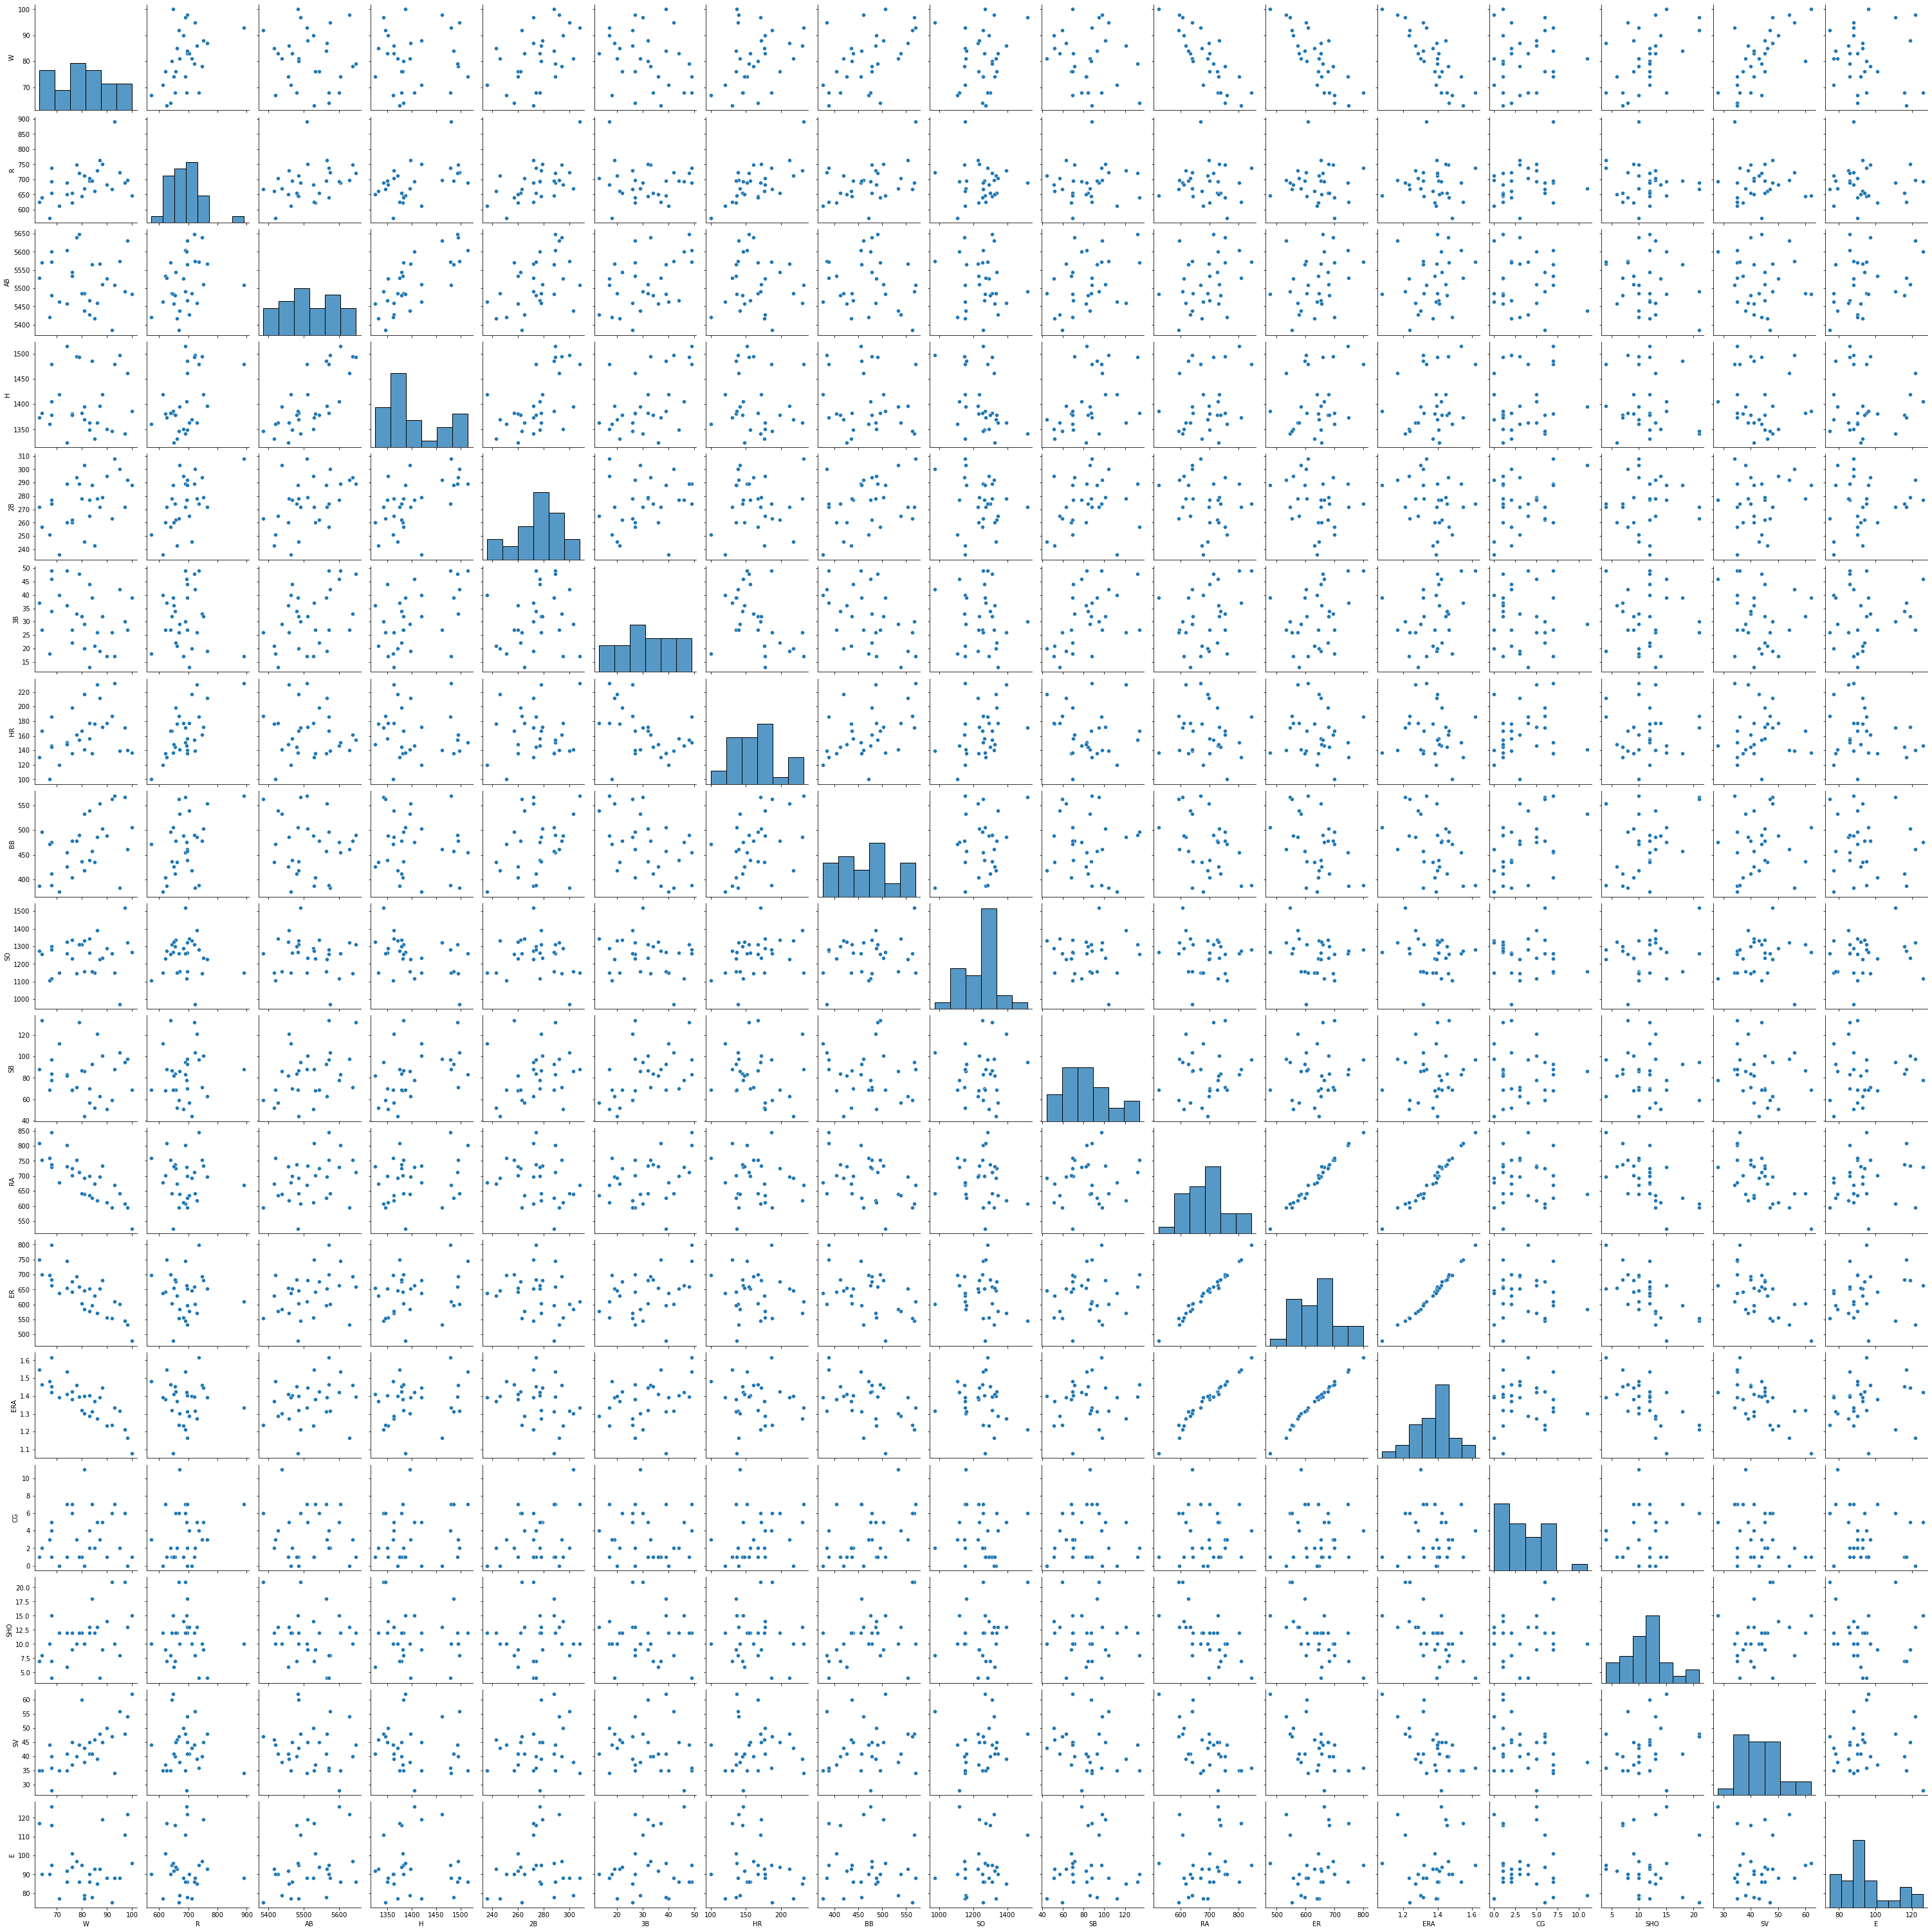

In [37]:
sns.pairplot(bos)

In [39]:
x=bos.iloc[:,0:-1]
x.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV
0,95,724,5575,1497,300,42,139,383,973,104,641,601,1.316408,2,8,56
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,1.403643,2,12,45
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,1.300192,11,10,38
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,1.381282,7,9,37
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,1.534714,7,12,35


In [40]:
y=bos.iloc[:,-1]
y.head()

0     88
1     86
2     79
3    101
4     86
Name: E, dtype: int64

In [41]:
x.shape

(30, 16)

In [42]:
y.shape

(30,)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [44]:
x_train.shape

(20, 16)

In [45]:
y_train.shape

(20,)

In [46]:
x_test.shape

(10, 16)

In [47]:
y_test.shape

(10,)

In [48]:
lm= LinearRegression()

In [49]:
lm.fit(x_train,y_train)

LinearRegression()

In [50]:
lm.coef_

array([-3.18047607e+00,  5.24743360e-01,  9.72915072e-02, -1.16667307e-01,
       -7.32868646e-01,  6.18926659e-01, -2.45413158e-01, -1.26903877e-01,
       -8.52945139e-03,  2.88669106e-01,  1.93490353e+00, -2.49032657e+00,
        2.32041254e+02,  4.32716325e+00,  1.48798173e+00,  4.92237350e+00])

In [51]:
lm.intercept_

-417.44698074713847

In [52]:
bos.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [53]:
lm.score(x_train,y_train)

0.850895852360243

In [54]:
pred=lm.predict(x_test)
print('Predicted result win:',pred)
print('W',y_test)

Predicted result win: [130.4707501  107.7262751  113.07313003 124.56292882 133.69585522
 109.23354979 143.60229991  91.08967783  80.79215298 118.4703322 ]
W 27     86
15     96
23     90
17    111
8      95
9      97
28     92
24    117
12     93
0      88
Name: E, dtype: int64
